In [24]:
# top 10 songs 
# go through the dictionary and create a counter of the top10 songs tokens


from collections import Counter
import math, glob, csv, re, numpy
from matplotlib import pyplot
import json
from collections import defaultdict
import os
import fnmatch

In [25]:
def find_all(name, path):
    l=[]
    for filename in os.listdir(path):
#         print (filename)
        if fnmatch.fnmatch(filename,"*"+name+"*"):
            l.append(filename)
    print (l)
    return l

In [26]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.split(",")
            word=word.rstrip()## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [27]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score

#longer paragraphs arent overweighted

In [28]:
word_weights = load_word_weights("bingliu.csv")

In [29]:
# import pandas as pd
# data = pd.read_csv("top10.csv")

import csv

from collections import defaultdict

top10dict=defaultdict(list)
input_file = csv.DictReader(open("top10.csv"))
for row in input_file:
    top10dict[row["author"]].append({"album":row["album"],"song":row["song"],"year":row["year"],"list_count":row["listen_count"]})

In [30]:
filenames=find_all('Tyler,TheCreator',"../")

['Lyrics_Tyler,TheCreator{.Golbin.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json', 'Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Wolf.json']


In [31]:
def load_album(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    with open(text_file) as json_file:
        data = json.load(json_file)
#         print (type(data))
    ## here's where we actually read the file
#     with open(text_file, encoding="utf-8") as file:
#         print (type(file))
        ## This block reads a file line by line.
        for line in data["songs"]:
#             print (line)
#             print (type(line))
#             print (line[0])
            title=line['title']
            album=line['album']
            line = line['lyrics'].rstrip()
#             print (line)
            tokens = word_pattern.findall(line)
#             print (tokens)
#             ## turn a list into a word->count map
            paragraph_counts = Counter(tokens)
        
#             ## create the paragraph object, with the original text, 
#             ##  the word counts, and the total score.
#             print (line['title'])
            paragraphs.append({'title': title,'album':album,'text': line, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })

    return paragraphs

In [97]:
#all albums for the artist

def load_artist(artist):
    
    complete=[]
    filenames=find_all(artist,"../")
    
    
    for file in filenames:
         complete.extend(load_album("../"+file))
            
    return complete

In [98]:
complete_sentiment=load_artist("Tyler,")
complete_sentiment_frank=load_artist("Frank")

['Lyrics_Tyler,TheCreator{.Golbin.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json', 'Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Wolf.json']
['Lyrics_FrankOcean{.Channel-Orange.json', 'Lyrics_FrankOcean{.nostalgia-ULTRA.json', 'Lyrics_FrankOcean{.Blonde.json', 'Lyrics_FrankOcean{.Endless.json']


In [99]:
top10=[]

# print (top10dict)
for x in top10dict["Tyler, The Creator"]:
    for y in complete_sentiment:
        if y['title']==x['song']:
            y['play_count']=x["list_count"]
            top10.append(y)
top10

[{'title': 'EARFQUAKE',
  'album': 'IGOR',
  'text': "For real, for real this time\nFor real, for real, for real this time\nBitch, I cannot fall short\nFor real, for real, for real this time (Yeah, yeah)\nFor real, for real, for real this time\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n'Cause you make my earth quake\nOh, you make my earth quake (Earthquake, ooh)\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n\nDon't leave, it's my fault\nDon't leave, it's my fault\nDon't leave, it's my fault (Girl)\n’Cause when it all comes crashing down I’ll need you\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, you’re telling me something is bad\nAnd it's making my heart break\n'Cause you make my earth quake, oh, you make my earth quake\n(Earth quake, yeah)\nRiding around, your love be shakin' me up\nAnd it’s making my heart break (You already k

[{'title': 'NEW MAGIC WAND', 'album': 'IGOR', 'text': "Sometimes you gotta close a door to open a window\n\nI saw a photo, you looked joyous\nMy eyes are green, I eat my veggies\nI need to get her out the picture\nShe's really fuckin' up my frame\nShe's not developed like we are\n\nLike magic, like magic, like magic, gone\nNew magic, new magic, new magic wand\nLike magic, like magic, like magic, gone (Nigga)\nNew magic, new magic, new magic wand\n\nMy brother said I'm on the spectrum\nDon't call me selfish, I hate sharin'\nThis 60-40 isn't workin'\nI want a hundred of your time, you're mine\n\nPlease don't leave me now\nPlease don't leave me now (Don't leave)\nPlease don't leave me now\nPlease don't leave me now (Don't leave)\nPlease don't leave me now (Don't leave)\n(Like magic, like magic, like magic, gone)\nPlease don't leave me now (I can make her leave)\n(New magic, new magic, new magic wand)\nPlease don't leave me now (Don't leave)\n(Like magic, like magic, like magic, gone)\nPle

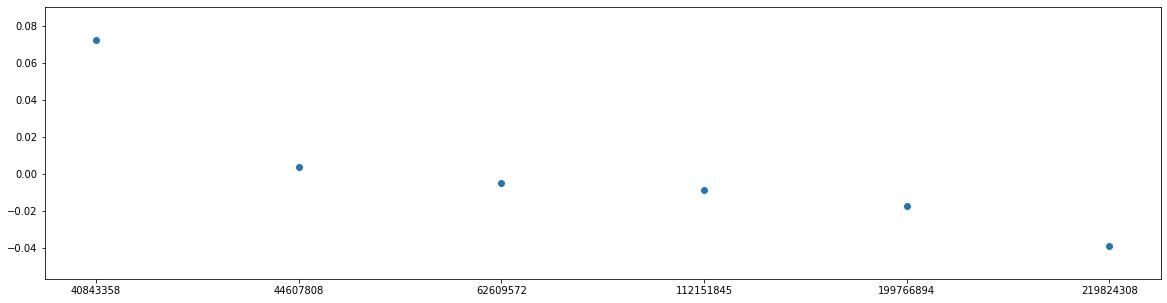

array([ 0.07261411,  0.00380228, -0.00483092, -0.00843882, -0.01746725,
       -0.03896104])

In [100]:
# print (top10)
# sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
sorted_songs_artist = sorted(top10, key=lambda x: int(x["play_count"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
print (sorted_songs_artist)
play_count = numpy.array([x['play_count'] for x in sorted_songs_artist])
print (play_count)
score_count = numpy.array([x['score'] for x in sorted_songs_artist])
print (score_count)
pyplot.figure(figsize=(20, 5))
pyplot.scatter(play_count,score_count)
pyplot.show()

score_count

In [101]:
top10=[]

# print (top10dict)
for x in top10dict["Frank Ocean"]:
    for y in complete_sentiment_frank:
        if y['title']==x['song']:
            y['play_count']=x["list_count"]
            top10.append(y)
top10

[{'title': 'Nights',
  'album': 'Blonde ',
  'text': "Round your city, round the clock\nEverybody needs you\nNo, you can't make everybody equal\nAlthough you got beaucoup family\nYou don't even got nobody bein' honest with you\nBreathe 'til I evaporated\nMy whole body see through\nTransportation, handmade (G)\nAnd I know it better than most people\nI don't trust 'em anyways\nYou can't break the law with them\nGet some gushy, have a calm night\nShooters killin' left and right\nWorkin' through your worst night\nIf I get my money right\nYou know I won't need you\nAnd I tell you, (bitch)\nI hope the sack is full up\nI'm fuckin', no, I'm fucked up\nSpend it when I get that\nI ain't tryna keep you\nCan't keep up a conversation\nCan't nobody reach you\nWhy your eyes well up?\nDid you call me from a séance?\nYou are from my past life\nHope you're doin' well, bruh\nI been out here head first\nAlways like the head first\nSignal comin' in and out\nHope you're doin' well, bruh\nEverybody needs you

[{'title': 'White Ferrari', 'album': 'Blonde ', 'text': "Bad luck to talk on these rides\nMine on the road, your dilated eyes watch the clouds float\nWhite Ferrari, had a good time\n(Sweet 16, how was I supposed to know anything?)\nI let you out at Central\nI didn't care to state the plain\nKept my mouth closed, we're both so familiar\nWhite Ferrari, good times\nStick by me, close by me\nYou were fine, you were fine here\nThat's just a slow body\nYou left when I forgot to speak\nSo I text the speech, lesser speeds, Texas speed, yes\nBasic takes its toll on me, 'ventually, 'ventually, yes\nAhh, on me 'ventually, 'ventually, yes\nI care for you still and I will forever\nThat was my part of the deal, honest\nWe got so familiar\nSpending each day of the year\nWhite Ferrari, good times\nIn this life (life), in this life (life)\nOne too many years\nSome tattooed eyelids on a facelift\n(Thought you might want to know now)\nMind over matter is magic, I do magic\nIf you think about it, it'll be

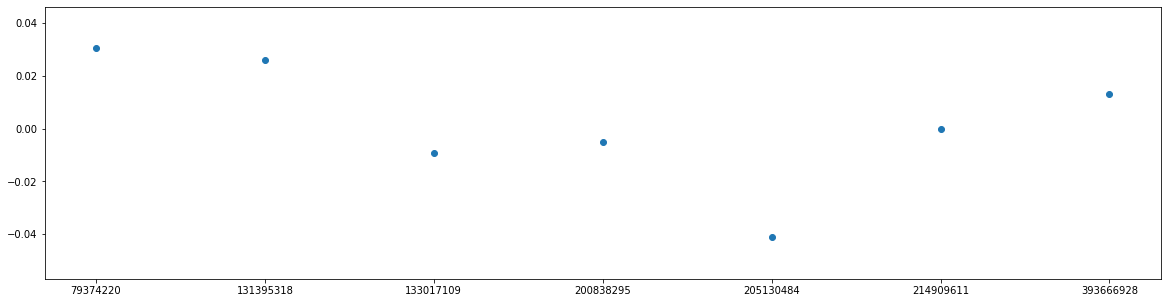

array([ 0.03030303,  0.0258216 , -0.00917431, -0.00527704, -0.04120444,
        0.        ,  0.01320132])

In [102]:
# print (top10)
# sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
sorted_songs_artist = sorted(top10, key=lambda x: int(x["play_count"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
print (sorted_songs_artist)
play_count = numpy.array([x['play_count'] for x in sorted_songs_artist])
print (play_count)
score_count = numpy.array([x['score'] for x in sorted_songs_artist])
print (score_count)
pyplot.figure(figsize=(20, 5))
pyplot.scatter(play_count,score_count)
pyplot.show()

score_count